<a href="https://colab.research.google.com/github/esfandiaryfard/Calculator/blob/master/XORExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
def generate_xor_dataset(num_samples = 5000):
  data = torch.randint(
      low = 0 , high = 2, size=(num_samples,2), dtype=torch.float32
      )
  labels = (data.sum(dim=1) == 1).to(torch.float32)
  data += 0.1 * torch.randn(data.shape)
  return data, labels

In [ ]:
data, labels = generate_xor_dataset()

In [ ]:
for i in range(10):
  print(f"x: {data[i]}, label: {labels[i]}")

x: tensor([-0.0810,  1.2010]), label: 1.0
x: tensor([0.1132, 1.0646]), label: 1.0
x: tensor([ 0.9989, -0.0185]), label: 1.0
x: tensor([ 1.0519, -0.1684]), label: 1.0
x: tensor([1.1109, 0.0776]), label: 1.0
x: tensor([ 1.1011, -0.0041]), label: 1.0
x: tensor([ 0.1475, -0.2488]), label: 0.0
x: tensor([0.9007, 0.9827]), label: 0.0
x: tensor([0.9730, 0.9553]), label: 0.0
x: tensor([1.0182, 1.0917]), label: 0.0


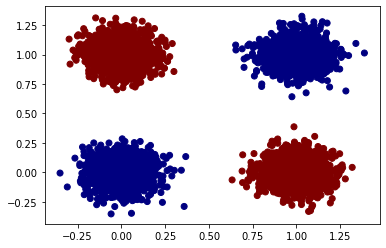

In [ ]:
# Plot the XOR dataset
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], c = labels, cmap = "jet")
plt.show()

In [ ]:
from torch.utils.data import Dataset

class XORDataset(Dataset):
  def __init__(self, num_samples = 5000):
    super().__init__()

    self.size = num_samples
    self.data, self.labels = generate_xor_dataset(self.size)

  def __len__(self):
    # Number of data point we have.
    return self.size # len(self.data)

  def __getitem__(self, idx):
    # Return the idx-th data point of the dataset
    # If we have multiple things to return (e.g., data point and label), 
    # we can return them as tuple
    data_point = self.data[idx]
    data_label = self.labels[idx]
    return data_point, data_label

In [ ]:
point, label = XORDataset()[0]
print("Point:", point)
print("Label:", label)

Point: tensor([0.2212, 0.0301])
Label: tensor(0.)


In [ ]:
from torch.utils.data import DataLoader

dset_train = XORDataset(num_samples = 5000)
dset_test = XORDataset(num_samples = 500)

dloader_train = DataLoader(dset_train, batch_size = 50, shuffle=True)
dloader_test = DataLoader(dset_test, batch_size = 50)

In [ ]:
torch.nn.Module

torch.nn.modules.module.Module

In [96]:
class XORModel(nn.Module):
  # Constructor
  def __init__(self, input_dim, output_dim):
    super(XORModel, self).__init__()
    self.layer1 = torch.nn.Linear(in_features=input_dim, out_features=output_dim)

  #forward
  def forward(self, x):
    output = self.layer1(x) # Computes sum(w*x + b)
    
    return output 

In [97]:
# Create the model
net = XORModel(input_dim = 2, output_dim = 1)


In [99]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.BCEWithLogitsLoss()

Epoch 1: TrL= 0.7654047274589538
Epoch 2: TrL= 0.7266254508495331
Epoch 3: TrL= 0.7082167625427246
Epoch 4: TrL= 0.699674580693245
Epoch 5: TrL= 0.6958071655035019
Epoch 6: TrL= 0.6941219246387482
Epoch 7: TrL= 0.6934144687652588
Epoch 8: TrL= 0.6930870449543
Epoch 9: TrL= 0.6929139423370362
Epoch 10: TrL= 0.6928506797552109
Epoch 11: TrL= 0.6928116577863693
Epoch 12: TrL= 0.6927846789360046
Epoch 13: TrL= 0.6927842706441879
Epoch 14: TrL= 0.6927684617042541
Epoch 15: TrL= 0.6927809458971024
Epoch 16: TrL= 0.6927682942152024
Epoch 17: TrL= 0.692778566479683
Epoch 18: TrL= 0.6927706933021546
Epoch 19: TrL= 0.6927824336290359
Epoch 20: TrL= 0.6927698767185211
Epoch 21: TrL= 0.692776038646698
Epoch 22: TrL= 0.6927769732475281
Epoch 23: TrL= 0.6927747642993927
Epoch 24: TrL= 0.6927769595384597
Epoch 25: TrL= 0.6927711915969849
Epoch 26: TrL= 0.6927715677022934
Epoch 27: TrL= 0.692776283621788
Epoch 28: TrL= 0.6927798193693161
Epoch 29: TrL= 0.6927649480104446
Epoch 30: TrL= 0.6927817445993

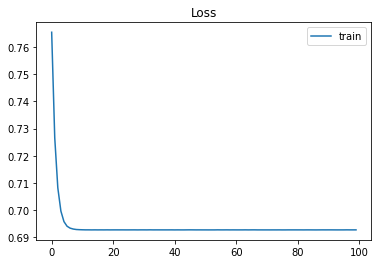

In [100]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs = 100):
    history_loss = []   
    model.train()
    for epoch in range(num_epochs):
        sum_loss = 0
        for data_inputs, data_labels in data_loader:
            preds = model(data_inputs) 
            preds = preds.squeeze(dim=1) 
            loss = loss_module(preds, data_labels)
            sum_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        epoch_loss = sum_loss / len(data_loader)
        history_loss.append(epoch_loss)
        print(f"Epoch {epoch+1}: TrL= {epoch_loss}")

    plt.title("Loss")
    plt.plot(history_loss, label="train")
    plt.legend()
    plt.show()

train_model(net, optimizer, dloader_train, criterion)

In [102]:
def eval_model(model, data_loader):
    model.eval() 
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): 
        for data_inputs, data_labels in data_loader:
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) 
            pred_labels = (preds >= 0.5).long() 
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print("Accuracy of the model: %4.2f%%" % (100.0*acc))

eval_model(net, dloader_test)

Accuracy of the model: 61.00%
